In [2]:
import SimpleITK as sitk
import matplotlib.pylab as plt
import numpy as np
import pydicom as dicom
import pylidc as pl

In [19]:
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1,   ## filtrar CTs por caracteristica
                                 pl.Scan.pixel_spacing <= 0.6)
print(scans.count()) ## numero encontrado com filtro

pid = 'LIDC-IDRI-0078'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first() ## filtrar por ID paciente

31


In [18]:
print(len(scan.annotations)) ## usado para ver quantas anotacoes existem por paciente

13


In [4]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))


for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i]))) ## report do paciente

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.


In [5]:
vol = scan.to_volume() ## transformando em np.array => preparar para image-processing
print(vol.shape)

Loading dicom files ... This may take a moment.
(512, 512, 87)


In [6]:
print("%.2f, %.2f" % (vol.mean(), vol.std()))

-702.15, 812.52


Loading dicom files ... This may take a moment.


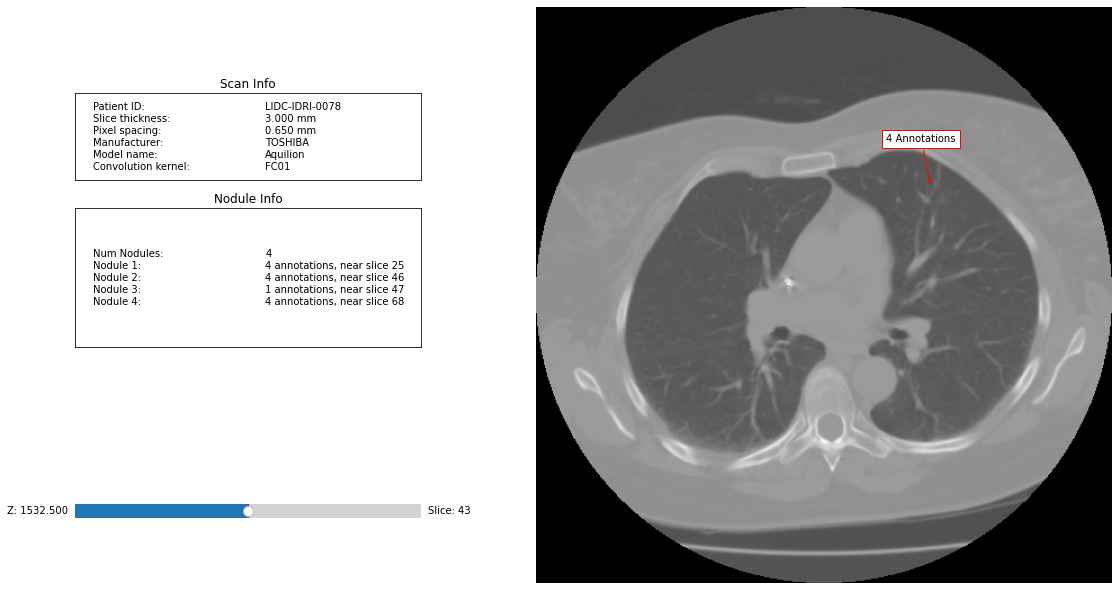

In [7]:
scan.visualize(annotation_groups=nods) ## visualizar anotacoes com GUI

In [7]:
pid = 'LIDC-IDRI-0008'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
print(scan.annotations)

[Annotation(id=129,scan_id=19), Annotation(id=130,scan_id=19), Annotation(id=131,scan_id=19), Annotation(id=132,scan_id=19), Annotation(id=133,scan_id=19), Annotation(id=134,scan_id=19), Annotation(id=135,scan_id=19)]
